In [1]:
# Import the primary data analysis libraries
import matplotlib.pyplot as plt
import numpy as np 
import scipy as sp
from scipy import signal
import pandas as pd

In [98]:
import os
log_path = 'data'
for filename in os.listdir(log_path):
    print(filename)
df1 = pd.read_csv(log_path+'/SL3T_20210605_115300.csv').dropna()
df2 = pd.read_csv(log_path+"/SL3B_20210605_120101.csv").dropna();
chest = pd.read_csv(log_path+"/chest_20210605_134859.csv").dropna();
idle = pd.read_csv(log_path+"/idle_20210605_140613.csv").dropna();
#df3 = pd.read_csv(log_path+"/SL3T.csv").dropna();
df1['timestamp'] = pd.to_datetime(df1.timestamp, unit='ms')
df2['timestamp'] = pd.to_datetime(df2.timestamp, unit='ms')
chest['timestamp'] = pd.to_datetime(chest.timestamp, unit='ms')
idle['timestamp'] = pd.to_datetime(idle.timestamp, unit='ms')
#df3['timestamp'] = pd.to_datetime(df3.timestamp, unit='ms')
#df1['timestamp'] = df1['timestamp'].apply(str).str[-5:].apply(int)
#df2['timestamp'] = df2['timestamp'].apply(str).str[-5:].apply(int)
#df3['timestamp'] = df3['timestamp'].apply(str).str[-5:].apply(int)

chest_20210605_134859.csv
Idle.csv
idle_20210605_140613.csv
raw.csv
SA3T.csv
SL3B.csv
SL3B_20210605_120101.csv
SL3D_n.csv
SL3T.csv
SL3T_20210605_115300.csv
SL3T_n.csv


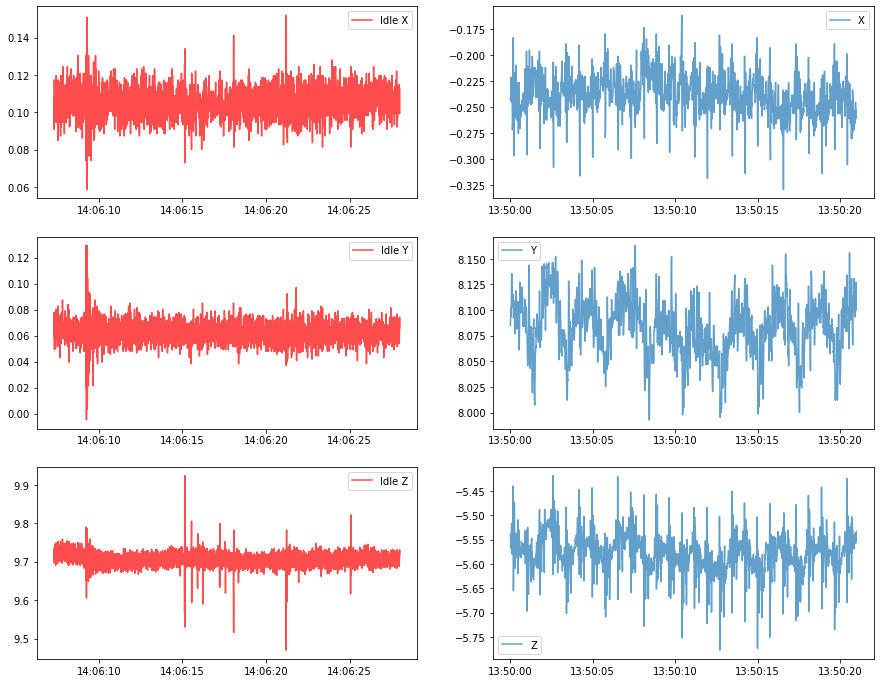

In [99]:
chest.index = chest.timestamp
idle.index = idle.timestamp
chest = chest['2021-06-05 13:50:00.000':'2021-06-05 13:50:20.000']
idle = idle['2021-06-05 14:06:07':'2021-06-05 14:06:27']
fig, ax = plt.subplots(3,2, figsize=(15,12))
ax[0,0].plot(idle.timestamp, idle.X, alpha=0.7, color="r")
ax[1,0].plot(idle.timestamp, idle.Y, alpha=0.7, color="r")
ax[2,0].plot(idle.timestamp, idle.Z, alpha=0.7, color="r")
ax[0,1].plot(chest.timestamp, chest.X, alpha=0.7)
ax[1,1].plot(chest.timestamp, chest.Y, alpha=0.7)
ax[2,1].plot(chest.timestamp, chest.Z, alpha=0.7)
#ax.plot(chest.timestamp, np.sqrt(chest.X**2+chest.Y**2+chest.Z))
ax[0,0].legend(['Idle X']);ax[1,0].legend(['Idle Y']);ax[2,0].legend(['Idle Z'])
ax[0,1].legend('X');ax[1,1].legend('Y');ax[2,1].legend('Z')


In [100]:
#filter the part of signal which does not correspond to walking
df1.index = df1.timestamp; df2.index = df2.timestamp
df1 = df1['2021-06-05 11:53:10':'2021-06-05 11:53:25']
df2 = df2['2021-06-05 12:01:05':'2021-06-05 12:01:20']

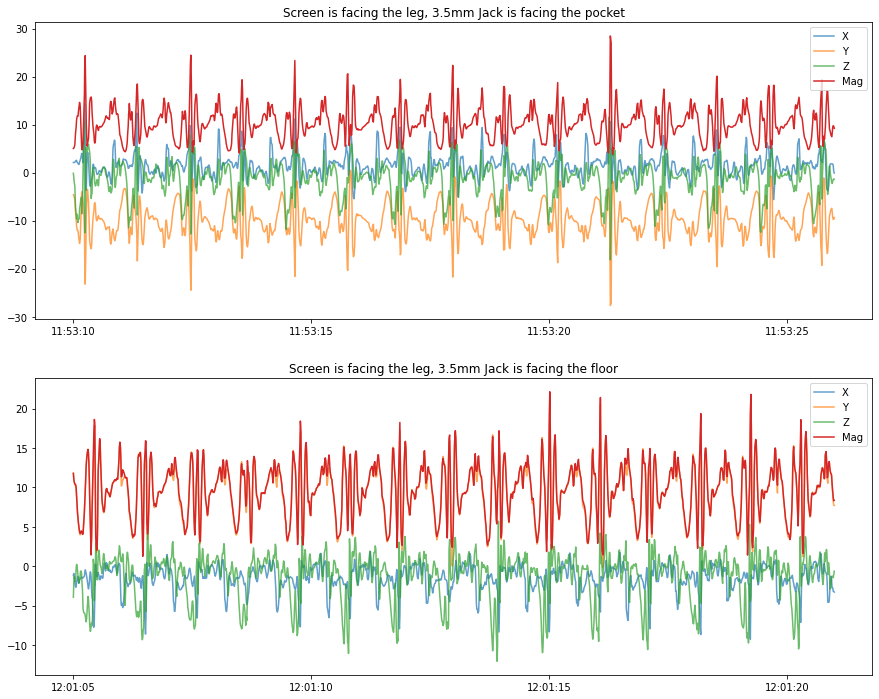

In [101]:
fig, ax = plt.subplots(2,1, figsize=(15,12), )
ax[0].plot(df1.timestamp, df1.X, alpha=0.7)
ax[0].plot(df1.timestamp, df1.Y, alpha=0.7)
ax[0].plot(df1.timestamp, df1.Z, alpha=0.7)
ax[0].plot(df1.timestamp, np.sqrt(df1.X**2+df1.Y**2+df1.Z))
ax[0].set_title('Screen is facing the leg, 3.5mm Jack is facing the pocket')
ax[0].legend(['X', 'Y', 'Z', 'Mag'])


ax[1].plot(df2.timestamp, df2.X, alpha=0.7)
ax[1].plot(df2.timestamp, df2.Y, alpha=0.7)
ax[1].plot(df2.timestamp, df2.Z, alpha=0.7)
ax[1].plot(df2.timestamp, np.sqrt(df2.X**2+df2.Y**2+df2.Z))
ax[1].set_title('Screen is facing the leg, 3.5mm Jack is facing the floor')
ax[1].legend(['X', 'Y', 'Z', 'Mag'])

#ax[2].plot(df2.timestamp, df2.AccX, alpha=0.7)
#ax[2].plot(df2.timestamp, df2.AccY, alpha=0.7)
#ax[2].plot(df2.timestamp, df2.AccZ , alpha=0.7)
#ax[2].plot(df2.timestamp, np.sqrt(df2.AccX**2+df2.AccY**2+df2.AccZ))
#ax[2].set_title('Screen is facing the leg, 3.5mm Jack is facing at the bottom')
#x[2].legend(['X', 'Y', 'Z', 'Mag'])

In [102]:
acc1_mag = np.sqrt(df1.X**2+df1.Y**2+df1.Z)
print("**Accel stats TYPE 1**")
sample_time_in_s = df1.timestamp.iloc[-1] - df1.timestamp.iloc[0]
print("Length (raw diff): {} secs".format(sample_time_in_s.seconds))
print("Avg x: {:.2f} (SD={:.2f})".format(np.mean(df1.X), np.std(df1.X)))
print("Avg y: {:.2f} (SD={:.2f})".format(np.mean(df1.Y), np.std(df1.Y)))
print("Avg z: {:.2f} (SD={:.2f})".format(np.mean(df1.Z), np.std(df1.Z)))
print("Avg mag: {:.2f} (SD={:.2f})\n\n".format(np.mean(acc1_mag), np.std(acc1_mag)))

acc2_mag = np.sqrt(df2.X**2+df2.Y**2+df2.Z)
print("**Accel stats TYPE 2**")
sample_time_in_s2 = df2.timestamp.iloc[-1] - df2.timestamp.iloc[0]
print("Length (raw diff): {} secs".format(sample_time_in_s2.seconds))
print("Avg x: {:.2f} (SD={:.2f})".format(np.mean(df2.X), np.std(df2.X)))
print("Avg y: {:.2f} (SD={:.2f})".format(np.mean(df2.Y), np.std(df2.Y)))
print("Avg z: {:.2f} (SD={:.2f})".format(np.mean(df2.Z), np.std(df2.Z)))
print("Avg mag: {:.2f} (SD={:.2f})".format(np.mean(acc2_mag), np.std(acc2_mag)))

**Accel stats TYPE 1**
Length (raw diff): 15 secs
Avg x: 1.56 (SD=2.43)
Avg y: -9.88 (SD=3.51)
Avg z: -1.29 (SD=3.60)
Avg mag: 10.29 (SD=3.34)


**Accel stats TYPE 2**
Length (raw diff): 15 secs
Avg x: -1.54 (SD=1.65)
Avg y: 9.61 (SD=3.38)
Avg z: -1.28 (SD=2.99)
Avg mag: 9.78 (SD=3.46)


In [103]:
#Derive sampling rate for TYPE 1
sample_time_in_s = df1.timestamp.iloc[-1] - df1.timestamp.iloc[0]
map_sec_to_sample_count = dict()
for timestamp_ms in df1.timestamp:
    sec_floor = timestamp_ms.second
    if sec_floor not in map_sec_to_sample_count:
        map_sec_to_sample_count[sec_floor] = 0
    map_sec_to_sample_count[sec_floor] = map_sec_to_sample_count[sec_floor] + 1

print("Length (raw diff): {} secs".format(sample_time_in_s.seconds))
print("Length (rounded ceiling): {} secs".format(len(map_sec_to_sample_count)))

Length (raw diff): 15 secs
Length (rounded ceiling): 16 secs


In [104]:
#Derive sampling rate for TYPE 2
sample_time_in_s = df2.timestamp.iloc[-1] - df2.timestamp.iloc[0]
map_sec_to_sample_count = dict()
for timestamp_ms in df2.timestamp:
    sec_floor = timestamp_ms.second
    if sec_floor not in map_sec_to_sample_count:
        map_sec_to_sample_count[sec_floor] = 0
    map_sec_to_sample_count[sec_floor] = map_sec_to_sample_count[sec_floor] + 1

print("Length (raw diff): {} secs".format(sample_time_in_s.seconds))
print("Length (rounded ceiling): {} secs".format(len(map_sec_to_sample_count)))

Length (raw diff): 15 secs
Length (rounded ceiling): 16 secs


In [105]:
print("***TYPE 2***")
counts = list(map_sec_to_sample_count.values())
np_counts = np.array(counts)
sampling_rate_imprecise = df1.timestamp.size / sample_time_in_s.seconds
print("Coarse sampling rate: {:.2f} samples/sec".format(sampling_rate_imprecise))
sampling_rate = np.average(np_counts)
print("More precise sampling rate calc: {:.2f} samples/sec (SD={:.2f} samples/sec)".format(sampling_rate, np.std(np_counts)))


***TYPE 2***
Coarse sampling rate: 100.80 samples/sec
More precise sampling rate calc: 94.12 samples/sec (SD=3.35 samples/sec)


In [106]:
print("***TYPE 1***")
counts = list(map_sec_to_sample_count.values())
np_counts = np.array(counts)
sampling_rate_imprecise = df1.timestamp.size / sample_time_in_s.seconds
print("Coarse sampling rate: {:.2f} samples/sec".format(sampling_rate_imprecise))
sampling_rate = np.average(np_counts)
print("More precise sampling rate calc: {:.2f} samples/sec (SD={:.2f} samples/sec)".format(sampling_rate, np.std(np_counts)))


***TYPE 1***
Coarse sampling rate: 100.80 samples/sec
More precise sampling rate calc: 94.12 samples/sec (SD=3.35 samples/sec)


In [107]:
# Perform some simple frequency analysis. What is the "frequency" of a walk?

# fourier transformations and frequency-based features
num_samples = len(acc1_mag)

# the mean substraction removes the y offset before performing FFT
fft = np.abs(np.fft.fft(acc1_mag - np.mean(acc1_mag)))
freqs = np.fft.fftfreq(len(fft))
freqs = freqs * sampling_rate # convert normalized freq bins to our freq bins

print("We have {} frequency bins of size {}Hz from {} to {}Hz".\
      format(len(freqs), (freqs[1]-freqs[0]), freqs[0], np.abs(freqs[num_samples//2])))
freqs = freqs[range(num_samples//2)] # one side freq range, integer division
abs_fft = np.abs(fft)[range(num_samples//2)] # one side freq range, integer division
abs_fft_normalized = abs_fft / num_samples # normalize to values 0 - 1

# find the max frequency
max_freq_idx = np.argmax(abs_fft_normalized)
max_freq = freqs[max_freq_idx]
print("The max frequency is: {} Hz".format(max_freq))

# find the top N frequencies
# see: https://stackoverflow.com/questions/10337533/a-fast-way-to-find-the-largest-n-elements-in-an-numpy-array?lq=1
top_n_freq = 3
ind = np.argpartition(abs_fft_normalized, -top_n_freq)[-top_n_freq:] # from https://stackoverflow.com/a/23734295
ind_sorted_by_coef = ind[np.argsort(-abs_fft_normalized[ind])] # reverse sort indices

# I appear to walk at ~1.6 Hz :)
print("Top 3 frequencies (freq, coef):", list(zip(freqs[ind_sorted_by_coef], abs_fft_normalized[ind_sorted_by_coef]))) # print top freq
top1_freq = freqs[ind_sorted_by_coef][0]
top2_freq = freqs[ind_sorted_by_coef][0]
top3_freq = freqs[ind_sorted_by_coef][0]

We have 1512 frequency bins of size 0.06225198412698412Hz from 0.0 to 47.0625Hz
The max frequency is: 1.8053075396825395 Hz
Top 3 frequencies (freq, coef): [(1.8053075396825395, 0.9693731883599283), (1.8675595238095237, 0.49899809819868046), (1.7430555555555554, 0.4436541414119572)]


Sampling rate: 94.12 Hz
Maximum detectable frequency in our signal is: 47.06 Hz (due to Nyquist theorem)


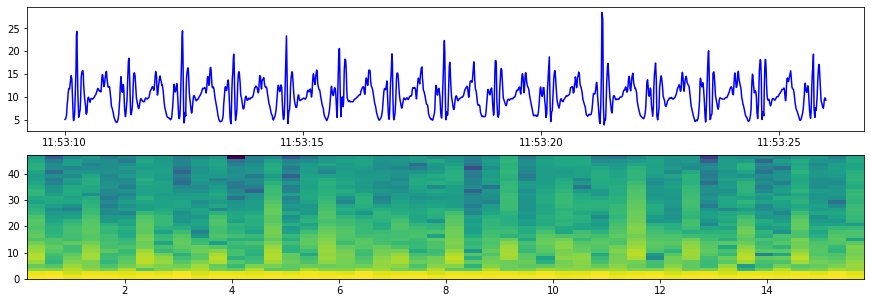

In [108]:
import math
# Visualize the frequency data. In this spectrogram plot, the y-axis is frequency
# and the x-axis is time. 
print("Sampling rate: {:0.2f} Hz".format(sampling_rate))
print("Maximum detectable frequency in our signal is: {:.2f} Hz (due to Nyquist theorem)".format(sampling_rate/2.0))

NFFT = 64       # the length of the windowing segments
fig, (axes1, axes2) = plt.subplots(2, 1, figsize=(15, 5)) # create two rows, one col of plots

axes1.plot(acc1_mag, 'b-', label="netMag Accel")
Pxx, freqs, bins, im = axes2.specgram(acc1_mag, NFFT=NFFT, Fs=sampling_rate, noverlap=math.ceil(NFFT/2.0))

Average of the signal [Before] = 10.28845418486221
Average of the signal [After] = 2.690381721049321e-16


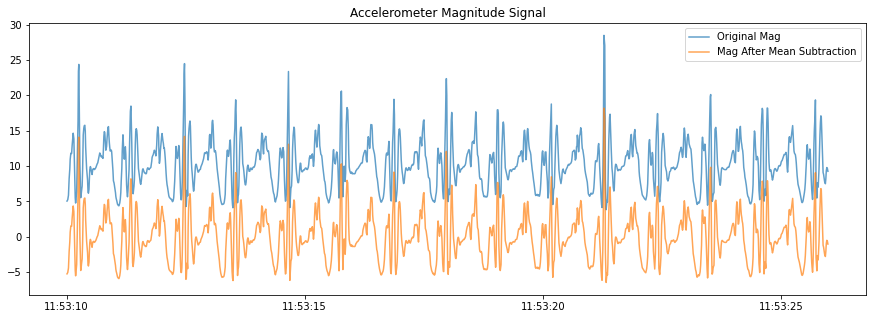

In [109]:
#Here, we'll subtract out the mean so that the average of the signal is 0
#useful to count ZCR
mag_after_mean_subtraction = acc1_mag - np.average(acc1_mag)
print("Average of the signal [Before] = {}".format(np.average(acc1_mag)))
print("Average of the signal [After] = {}".format(np.average(mag_after_mean_subtraction)))
fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height
axes.plot(acc1_mag, alpha=0.7, label="Original Mag")
axes.plot(mag_after_mean_subtraction, alpha=0.7, label="Mag After Mean Subtraction")
axes.set_title("Accelerometer Magnitude Signal")
axes.legend();

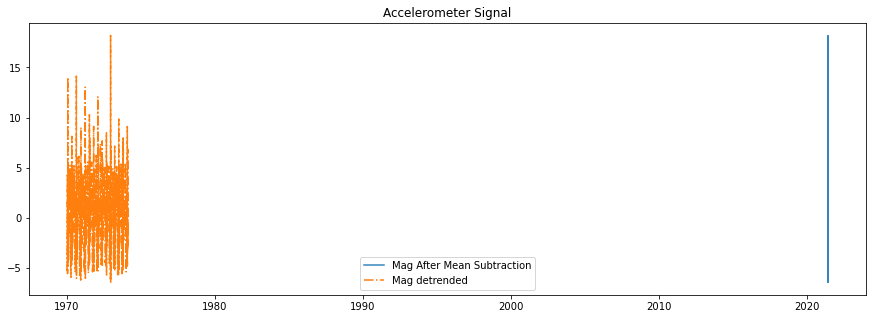

In [110]:
# We can also use scipy's built in detrend algorithm, which is the result
# of a linear least-squares fit to the data
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html
mag_detrended = sp.signal.detrend(acc1_mag) 
fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height
axes.plot(mag_after_mean_subtraction, alpha=0.9, label="Mag After Mean Subtraction")
axes.plot(mag_detrended, alpha=1, linestyle="-.", label="Mag detrended")
axes.set_title("Accelerometer Signal")
axes.legend()

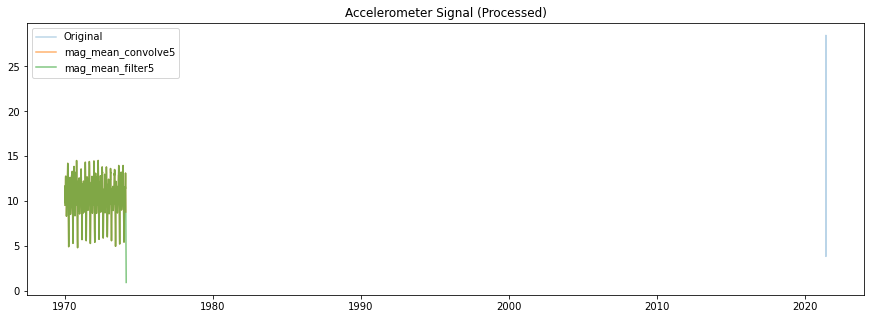

In [111]:
# Here are different mean smoothing filters
# Note that the filter window size should really be a function of your sampling rate

def mean_filter(signal, N):
    filter_signal = np.zeros((len(signal),))
    for ctr in range(len(signal)):
         filter_signal[ctr] = np.sum(signal[ctr:(ctr+N)])
    return filter_signal/N

filter_window_size = 10

# Convolve using a mean filter
mag_mean_convolve5 = np.convolve(acc1_mag, np.ones((filter_window_size,))/filter_window_size, mode='valid')
mag_mean_filter5 = mean_filter(acc1_mag, filter_window_size)
fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height
axes.plot(acc1_mag, alpha=0.3, label="Original")
axes.plot(mag_mean_convolve5, alpha=0.6, label="mag_mean_convolve5")
axes.plot(mag_mean_filter5, alpha=0.6, label="mag_mean_filter5")
# set the title and show the legend
axes.set_title("Accelerometer Signal (Processed)")
axes.legend()

In [79]:
np.ones((filter_window_size,))/filter_window_size

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])